# PCA

In [434]:
#initializing the libraries
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Loading in the Dataframe

In [435]:
# loading in the csv
df = pd.read_csv('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 1/Pokemon/Visualizations/Combined_Teams_2024_Updated.csv')
df.head()

,pokemon,item,ability,tera type,move_1,move_2,move_3,move_4,rank,wins,...,move_3_power,move_3_effect,move_3_effect_chance,move_3_accuracy,move_3_generation,move_4_power,move_4_effect,move_4_effect_chance,move_4_accuracy,move_4_generation
0,miraidon,choice specs,hadron engine,fairy,electro-drift,draco-meteor,dazzling-gleam,volt-switch,1,9,...,80.0,Inflicts regular damage.,NaN,100.0,6.0,70.0,"Inflicts regular damage, then the user immedia...",NaN,100.0,5.0
1,ogerpon,hearthflame mask,mold breaker,fire,spiky-shield,ivy-cudgel,wood-hammer,follow-me,1,9,...,120.0,Inflicts regular damage. User takes 1/3 the d...,NaN,100.0,4.0,NaN,"Until the end of this turn, any moves that opp...",NaN,100.0,3.0
2,urshifu,focus sash,unseen fist,water,detect,surging-strikes,close-combat,aqua-jet,1,9,...,120.0,"Inflicts regular damage, then lowers the user'...",100.0,100.0,4.0,40.0,Inflicts regular damage.,NaN,100.0,4.0
3,iron-hands,assault vest,quark drive,bug,drain-punch,wild-charge,fake-out,low-kick,1,9,...,40.0,Inflicts regular damage. Causes the target to...,100.0,100.0,3.0,NaN,Inflicts regular damage. Power increases with...,NaN,100.0,1.0
4,whimsicott,covert cloak,prankster,dark,moonblast,encore,light-screen,tailwind,1,9,...,NaN,Erects a barrier around the user's side of the...,NaN,100.0,1.0,NaN,"For the next three turns, all Pokémon on the u...",NaN,100.0,4.0


In [436]:
#changing the df to only contain teams with a rank of 5 or better
df = df[df['rank'] <= 5]
#reset the index to the new df
df = df.reset_index(drop=True)
#create a new df with only the rank column
df_rank = df['rank']
#add a column header to the rank column
df_rank = pd.DataFrame(df_rank, columns = ['rank'])
df_rank



,rank
0,1
1,1
2,1
3,1
4,1
...,...
115,5
116,5
117,5
118,5


### Preparing the DF to conduct PCA. We will have to remove any labels, and non-quantitative data.

In [437]:
# removing the pokemon name, item, ability, tera type, move names, tounrament, typing, move effect as these are all qualitative and not needed for the model.
df = df.drop(['pokemon', 'item', 'ability', 'tera type', 'move_1', 'move_2', 'move_3', 'move_4', 'tournament', 'type_one', 'type_two','type', 'move_1_effect', 'move_2_effect', 'move_3_effect', 'move_4_effect'  ], axis=1)
# removing the rank, pokemon_generation, and move_generations as these are labels and not needed for the model.
df = df.drop(['rank','pokemon_generation', 'move_1_generation', 'move_2_generation', 'move_3_generation', 'move_4_generation'], axis=1)
# cleaning the df for the NaN values to be replaced with 0 as it reflects either moves with 0 base power or 0 effect chance
df = df.fillna(0)
df

,wins,losses,stat_total,hp,attack,defense,special_attack,special_defense,speed,move_1_power,...,move_1_accuracy,move_2_power,move_2_effect_chance,move_2_accuracy,move_3_power,move_3_effect_chance,move_3_accuracy,move_4_power,move_4_effect_chance,move_4_accuracy
0,9,2,670,100,85,100,135,115,135,100.0,...,100.0,130.0,100.0,90.0,80.0,0.0,100.0,70.0,0.0,100.0
1,9,2,550,80,120,84,60,96,110,0.0,...,100.0,100.0,0.0,100.0,120.0,0.0,100.0,0.0,0.0,100.0
2,9,2,550,100,130,100,63,60,97,0.0,...,100.0,25.0,0.0,100.0,120.0,100.0,100.0,40.0,0.0,100.0
3,9,2,570,154,140,108,50,68,50,75.0,...,100.0,90.0,0.0,100.0,40.0,100.0,100.0,0.0,0.0,100.0
4,9,2,480,60,67,85,77,75,116,95.0,...,100.0,0.0,0.0,100.0,0.0,0.0,100.0,0.0,0.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,13,2,570,94,80,86,122,80,108,55.0,...,95.0,0.0,0.0,100.0,0.0,0.0,100.0,110.0,30.0,70.0
116,13,2,670,100,100,90,150,140,90,150.0,...,100.0,110.0,0.0,85.0,110.0,30.0,70.0,90.0,10.0,100.0
117,13,2,570,85,85,100,95,135,70,0.0,...,90.0,1.0,0.0,90.0,90.0,0.0,100.0,0.0,0.0,100.0
118,13,2,530,95,115,90,80,90,60,65.0,...,100.0,0.0,0.0,85.0,40.0,100.0,100.0,0.0,100.0,100.0


### Verifying that there are no missing values within the DF

In [438]:
# checking for missing values
df.isnull().sum()


wins                    0
losses                  0
stat_total              0
hp                      0
attack                  0
defense                 0
special_attack          0
special_defense         0
speed                   0
move_1_power            0
move_1_effect_chance    0
move_1_accuracy         0
move_2_power            0
move_2_effect_chance    0
move_2_accuracy         0
move_3_power            0
move_3_effect_chance    0
move_3_accuracy         0
move_4_power            0
move_4_effect_chance    0
move_4_accuracy         0
dtype: int64

### Verifying the Data Types

In [439]:
# checking the data types
df.dtypes

wins                      int64
losses                    int64
stat_total                int64
hp                        int64
attack                    int64
defense                   int64
special_attack            int64
special_defense           int64
speed                     int64
move_1_power            float64
move_1_effect_chance    float64
move_1_accuracy         float64
move_2_power            float64
move_2_effect_chance    float64
move_2_accuracy         float64
move_3_power            float64
move_3_effect_chance    float64
move_3_accuracy         float64
move_4_power            float64
move_4_effect_chance    float64
move_4_accuracy         float64
dtype: object

Text(0, 0.5, 'Count')

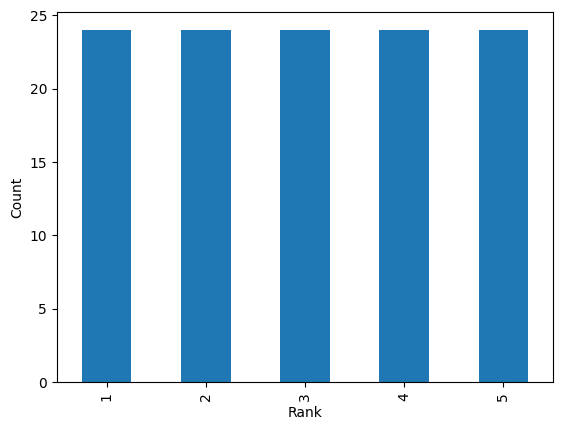

In [440]:
# Class Plots
df_rank['rank'].value_counts().plot(kind='bar')
plt.xlabel('Rank')
plt.ylabel('Count')


### Normalizing the Data

In [441]:
# normalizeing the data using sklearn standard scaler
X = df.iloc[:, 1:].values
X_normal = StandardScaler().fit_transform(X)
X_normal


array([[-0.4662524 ,  2.36347197,  0.26124999, ...,  0.96804571,
        -0.41926144,  0.17729688],
       [-0.4662524 ,  0.10267774, -0.58490383, ..., -0.79968993,
        -0.41926144,  0.17729688],
       [-0.4662524 ,  0.10267774,  0.26124999, ...,  0.21044472,
        -0.41926144,  0.17729688],
       ...,
       [-0.4662524 ,  0.47947678, -0.37336538, ..., -0.79968993,
        -0.41926144,  0.17729688],
       [-0.4662524 , -0.2741213 ,  0.04971154, ..., -0.79968993,
         2.61154414,  0.17729688],
       [-0.4662524 , -0.65092034,  0.04971154, ..., -0.79968993,
        -0.41926144,  0.17729688]])

In [442]:
pca = PCA()

principalComponents = pca.fit_transform(X_normal)


In [443]:
principalDF = pd.DataFrame(data = principalComponents)
#change the column names to reflect the principal components
principalDF = pd.DataFrame(data = principalComponents
                           , columns = ['PCA1', 'PCA2', 'PCA3', 'PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA12','PCA13','PCA14','PCA15','PCA16','PCA17','PCA18','PCA19','PCA20' ])

#add the rank column back to the principal components
principalDF = pd.concat([principalDF, df_rank], axis = 1)
#putting the rank column to the front of the df
cols = principalDF.columns.tolist()
cols = cols[-1:] + cols[:-1]
principalDF = principalDF[cols]

principalDF

,rank,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,...,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20
0,1,2.172949,-3.199790,-2.097900,0.710093,-0.319591,1.633446,-0.388668,0.014693,-0.263002,...,-0.721432,0.766731,-0.598512,0.264617,-0.401460,0.194451,0.240319,0.192731,-0.652576,-6.197998e-17
1,1,-0.310705,0.039049,-1.161996,-0.571987,0.732647,-0.838313,-1.122960,0.382643,1.057626,...,0.265439,-0.178475,-1.080227,0.316339,1.071264,-1.042014,-0.037071,-0.008590,-0.026809,9.384091e-16
2,1,-1.744520,-0.796050,0.408656,-1.358641,0.712920,-1.069225,0.088000,1.454820,2.129515,...,0.208784,0.446319,0.503309,1.127310,-0.323776,0.137084,-0.062253,0.516701,0.106763,-2.607077e-17
3,1,-3.156983,-0.917433,-0.296547,-1.456224,-1.080549,-0.240630,-0.383649,1.566832,-0.018338,...,-0.519543,0.201179,1.966641,-0.327440,-0.460163,0.033133,-0.859114,-0.190737,-0.315500,-9.653192e-17
4,1,0.845263,2.422318,0.343157,0.616297,-0.529532,-0.546030,-0.419900,-1.120930,0.626816,...,0.770253,0.446918,0.881427,0.891154,-0.068417,0.352384,0.531396,0.402384,-0.412996,-1.064757e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,5,1.371335,-0.346347,4.633585,6.143462,-0.382485,1.684355,0.324899,2.111729,1.312167,...,-0.153019,-1.695998,1.805962,0.570458,2.044091,-0.045320,-0.246183,-0.638635,-0.599565,1.030690e-18
116,5,3.256491,-4.703614,1.488428,-2.270570,0.140192,2.090151,-1.745389,-1.021061,-1.305585,...,2.080082,1.070664,0.307658,-2.364749,0.064683,0.553328,-0.237663,-0.648323,0.112009,-8.158859e-17
117,5,1.405158,0.063850,0.531394,-1.081445,-0.644689,-0.053135,0.450032,2.173535,-0.880199,...,1.072870,1.484591,-1.632438,0.998829,1.129409,-1.203078,1.133231,-0.784537,-1.034574,3.776799e-17
118,5,-0.497547,-0.010214,1.647895,-2.433214,-2.819640,0.899635,1.662893,0.044003,1.576890,...,-0.639564,0.955730,-0.217369,0.093331,-0.022873,0.227561,0.259966,-0.439154,-0.034137,-1.481567e-17


In [444]:
# computing the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# cummulating the explained variance to 4 decimal places
pca.explained_variance_ratio_.cumsum().round(4)

#
cumulative_variance = np.cumsum(explained_variance)
cumulative_variance



array([0.16467454, 0.28717591, 0.37946708, 0.45859518, 0.53016957,
       0.59051186, 0.64538366, 0.6960892 , 0.74284467, 0.7850585 ,
       0.82377624, 0.85938217, 0.8888264 , 0.91601825, 0.93988299,
       0.95998958, 0.97891756, 0.99276412, 1.        , 1.        ])

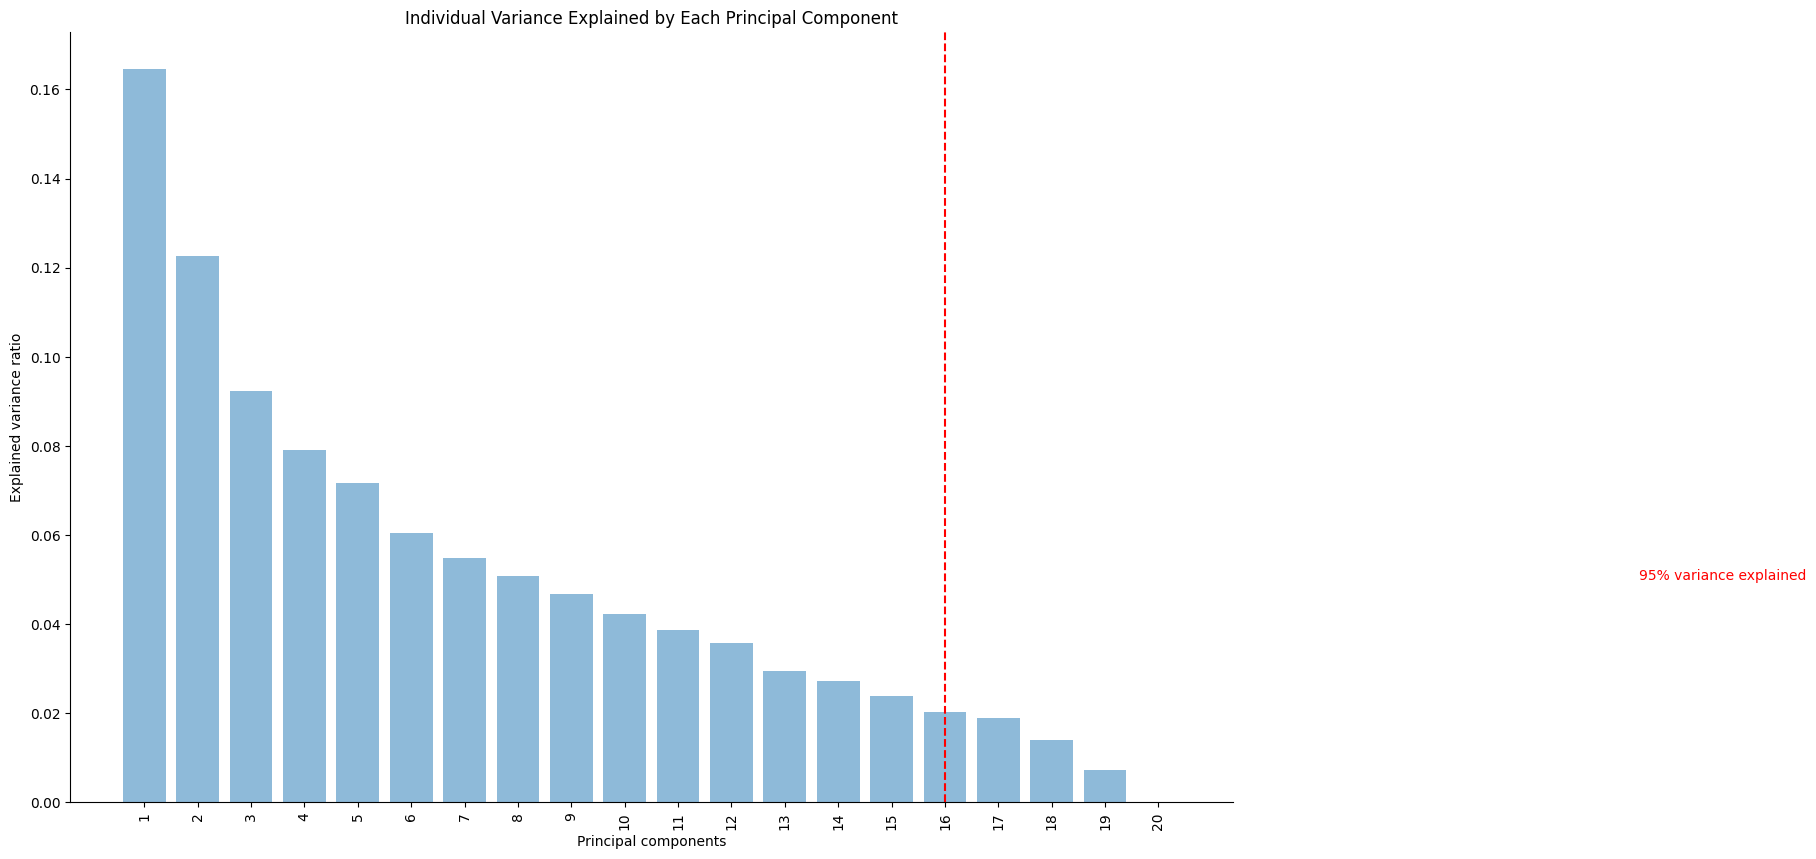

In [445]:
#
plt.figure()
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(range(1, len(explained_variance) + 1))
plt.title('Individual Variance Explained by Each Principal Component')
plt.grid(True)
# make the x-axis labels vertical
plt.xticks(rotation=90)
# make the plot bigger so we can read the x-axis labels
plt.gcf().set_size_inches(15, 10)
#put a vertical line at 16 and call it the '95% variance explained' line
plt.axvline(x=16, color='r', linestyle='--')
#put a label on the dashed line and call it the '95% variance explained' line
plt.text(29, 0.05, '95% variance explained', color = 'red')
#removing the grid lines
plt.grid(False)
#removing the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [447]:
# creating a new df with only the first 2 principal components
principalDF_2 = principalDF[['PCA1', 'PCA2', 'rank']]
principalDF_2

,PCA1,PCA2,rank
0,2.172949,-3.199790,1
1,-0.310705,0.039049,1
2,-1.744520,-0.796050,1
3,-3.156983,-0.917433,1
4,0.845263,2.422318,1
...,...,...,...
115,1.371335,-0.346347,5
116,3.256491,-4.703614,5
117,1.405158,0.063850,5
118,-0.497547,-0.010214,5


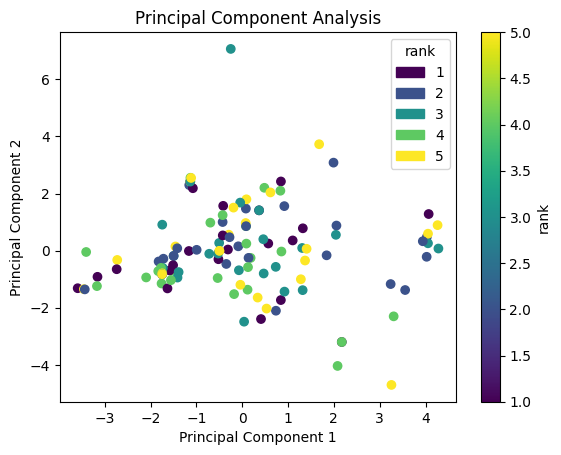

In [452]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a scatter plot
plt.figure()
scatter = plt.scatter(principalDF_2['PCA1'], principalDF_2['PCA2'], 
                      c=principalDF_2['rank'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis')

# Create a color bar
plt.colorbar(scatter, label='rank')

# Generate custom legend by manually creating handles
handles = [mpatches.Patch(color=scatter.cmap(scatter.norm(i)), label=str(i)) for i in range(1, 6)]
plt.legend(handles=handles, title='rank')
#drop the color bar from the visualization
#plt.colorbar(scatter, label='Pokemon Generation').remove()

plt.show()



In [453]:
# creating a new df with only the first 3 principal components
principalDF_3 = principalDF[['PCA1', 'PCA2', 'PCA3', 'rank']]

#save the df to a csv
principalDF_3.to_csv('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 2/PCA/PCA_3.csv', index=False)

principalDF_3

,PCA1,PCA2,PCA3,rank
0,2.172949,-3.199790,-2.097900,1
1,-0.310705,0.039049,-1.161996,1
2,-1.744520,-0.796050,0.408656,1
3,-3.156983,-0.917433,-0.296547,1
4,0.845263,2.422318,0.343157,1
...,...,...,...,...
115,1.371335,-0.346347,4.633585,5
116,3.256491,-4.703614,1.488428,5
117,1.405158,0.063850,0.531394,5
118,-0.497547,-0.010214,1.647895,5


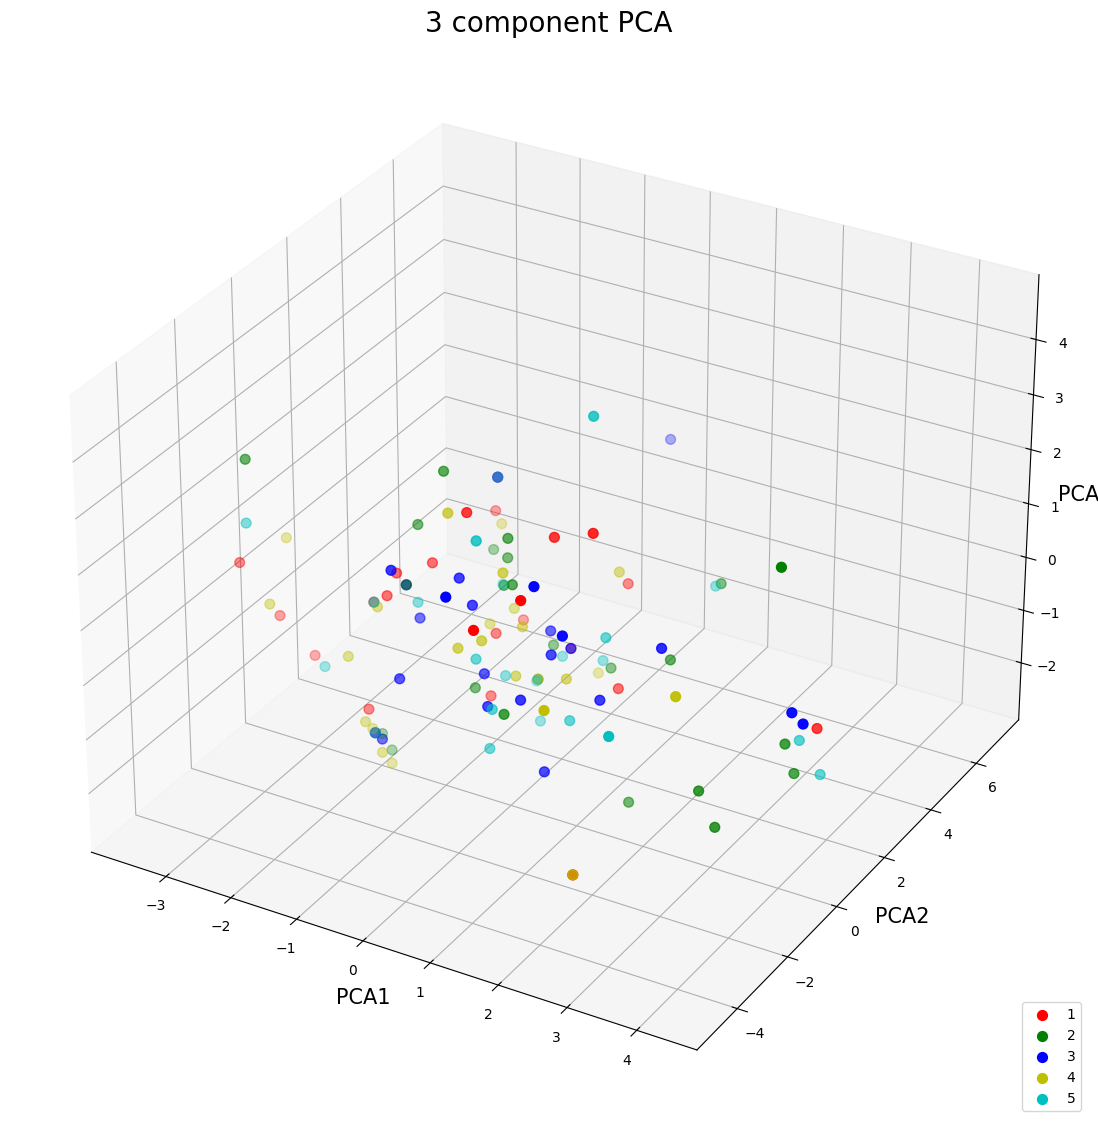

In [454]:
fig = plt.figure(figsize = (16,14))
ax = fig.add_subplot(1,1,1,  projection='3d')
ax.set_xlabel('PCA1', fontsize = 15)
ax.set_ylabel('PCA2', fontsize = 15)
ax.set_zlabel('PCA3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targetsName = ['1', '2', '3', '4', '5']

targets = [1,2,3,4,5]
colors = ['r', 'g', 'b', 'y', 'c']
for target, color in zip(targets,colors):
    indicesToKeep = principalDF_3['rank'] == target
    ax.scatter(  principalDF_3.loc[indicesToKeep, 'PCA1']
               , principalDF_3.loc[indicesToKeep, 'PCA2']
               , principalDF_3.loc[indicesToKeep, 'PCA3']
               , c = color
               , s = 50)
ax.legend(targetsName)
#move the legend to being in the plot
ax.legend(targetsName, loc='lower right')
ax.grid()